# Credit EDA Case Study


Team Members:
    Parag Talukdar
    Janarthanan Mani

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
#reading and checking the contents
df=pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [301]:
df.shape

(307511, 122)

In [302]:
#missing entries in percentage
missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
missing.head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [303]:
#cleaning

#Columns with more than 30% null entries

morethan30=df.isnull().sum()
morethan30=morethan30[morethan30.values>(0.3*len(morethan30))]
len(morethan30)


64

In [304]:
#Total 64 cols found with more than 30% null entries
#removing thease cols

morethan30 = list(morethan30[morethan30.values>=0.3].index)
df.drop(labels=morethan30,axis=1,inplace=True)
len(morethan30)



64

In [305]:
#checking null cols status

df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

In [306]:
# AMT_ANNUITY , CNT_FAM_MEMBERS and DAYS_LAST_PHONE_CHANGE have very less number of null entries.

print(df['AMT_ANNUITY'].describe())
print(df['CNT_FAM_MEMBERS'].describe())
print(df['DAYS_LAST_PHONE_CHANGE'].describe())

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64
count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


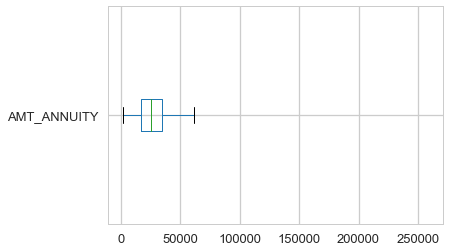

In [307]:
# Imputing for AMT_ANNUITY

df.boxplot(column=['AMT_ANNUITY'],vert=False)

In [308]:
# Data is skewed, so it is good to consider using median value for replacing the missing values.

val=df['AMT_ANNUITY'].median()
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=val

In [309]:
#Median Value considered for other two null value existing columns.
val=df['DAYS_LAST_PHONE_CHANGE'].median()
df.loc[df['DAYS_LAST_PHONE_CHANGE'].isnull(),'DAYS_LAST_PHONE_CHANGE']=val
val=df['CNT_FAM_MEMBERS'].median()
df.loc[df['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']=val

In [310]:
# Null value status now

df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [311]:
# Removing cols not required, Field having no effect on the risk analysis.

drop_cols=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=drop_cols,axis=1,inplace=True)

In [312]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [313]:
# NAs in catagorical columns

print('CODE_GENDER:')
df['CODE_GENDER'].value_counts()

CODE_GENDER:


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [314]:
print('ORGANIZATION_TYPE:')
df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE:


Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [315]:
# Cleaning the 4 XNA entries in CODE_GENDER and 55374 XNA entries in ORGANIZATION_TYPE
# Replacing CODE_GENDER XNA with F and 

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
print(df['CODE_GENDER'].value_counts())

F    202452
M    105059
Name: CODE_GENDER, dtype: int64


In [316]:
# Dropping 55374 rows in ORGANIZATION_TYPE with XNA

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
print(df[df['ORGANIZATION_TYPE']=='XNA'].shape)


(0, 28)


In [317]:
# Forcing numeric to be error free

numcols=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
df[numcols]=df[numcols].apply(pd.to_numeric)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 28 columns):
SK_ID_CURR                     252137 non-null int64
TARGET                         252137 non-null int64
NAME_CONTRACT_TYPE             252137 non-null object
CODE_GENDER                    252137 non-null object
FLAG_OWN_CAR                   252137 non-null object
FLAG_OWN_REALTY                252137 non-null object
CNT_CHILDREN                   252137 non-null int64
AMT_INCOME_TOTAL               252137 non-null float64
AMT_CREDIT                     252137 non-null float64
AMT_ANNUITY                    252137 non-null float64
NAME_INCOME_TYPE               252137 non-null object
NAME_EDUCATION_TYPE            252137 non-null object
NAME_FAMILY_STATUS             252137 non-null object
NAME_HOUSING_TYPE              252137 non-null object
REGION_POPULATION_RELATIVE     252137 non-null float64
DAYS_BIRTH                     252137 non-null int64
DAYS_EMPLOYED            

In [319]:
# Binning 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

# Binning income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

# Binning Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [320]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,252137.000000,252137.000000,252137.000000,2.521370e+05,2.521370e+05,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000
mean,278114.643103,0.086600,0.498515,1.759141e+05,6.113985e+05,27812.186704,0.020894,-14769.133174,-2384.169325,-4635.430849,-2800.639724,12.203302,0.017241,0.061919,0.049588,0.089769,0.281065,0.218988
std,102815.635309,0.281248,0.763161,2.588516e+05,4.065272e+05,14647.424282,0.013874,3662.573769,2338.360162,3252.169156,1515.360629,3.299799,0.130167,0.241008,0.217093,0.285851,0.449520,0.413561
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,0.000290,-25200.000000,-17912.000000,-22928.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189035.000000,0.000000,0.000000,1.125000e+05,2.779695e+05,17073.000000,0.010006,-17563.000000,-3175.000000,-6952.000000,-4177.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278064.000000,0.000000,0.000000,1.575000e+05,5.212800e+05,25834.500000,0.018850,-14573.000000,-1648.000000,-4265.000000,-2886.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367165.000000,0.000000,1.000000,2.115000e+05,8.292240e+05,35617.500000,0.028663,-11775.000000,-767.000000,-1845.000000,-1487.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,0.072508,-7489.000000,0.000000,0.000000,0.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [321]:
#We could understand from above describe that all days column have negative value which is not correct
#converting the same into absolute values
df.DAYS_BIRTH=df.DAYS_BIRTH.apply(lambda x: abs(x))
df.DAYS_EMPLOYED=df.DAYS_EMPLOYED.apply(lambda x: abs(x))
df.DAYS_REGISTRATION=df.DAYS_REGISTRATION.apply(lambda x: abs(x))
df.DAYS_ID_PUBLISH=df.DAYS_ID_PUBLISH.apply(lambda x: abs(x))

In [322]:
#print the describe of the data frame.
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,252137.000000,252137.000000,252137.000000,2.521370e+05,2.521370e+05,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000
mean,278114.643103,0.086600,0.498515,1.759141e+05,6.113985e+05,27812.186704,0.020894,14769.133174,2384.169325,4635.430849,2800.639724,12.203302,0.017241,0.061919,0.049588,0.089769,0.281065,0.218988
std,102815.635309,0.281248,0.763161,2.588516e+05,4.065272e+05,14647.424282,0.013874,3662.573769,2338.360162,3252.169156,1515.360629,3.299799,0.130167,0.241008,0.217093,0.285851,0.449520,0.413561
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189035.000000,0.000000,0.000000,1.125000e+05,2.779695e+05,17073.000000,0.010006,11775.000000,767.000000,1845.000000,1487.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278064.000000,0.000000,0.000000,1.575000e+05,5.212800e+05,25834.500000,0.018850,14573.000000,1648.000000,4265.000000,2886.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367165.000000,0.000000,1.000000,2.115000e+05,8.292240e+05,35617.500000,0.028663,17563.000000,3175.000000,6952.000000,4177.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,0.072508,25200.000000,17912.000000,22928.000000,7197.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [323]:
#converting days into years
df['age']=round(df.DAYS_BIRTH/365).astype('int32')
df['Employed_years']=round(df.DAYS_EMPLOYED/365).astype('int32')
df['registered_years']=round(df.DAYS_REGISTRATION/365).astype('int32')
df['id_published_years']=round(df.DAYS_ID_PUBLISH/365).astype('int32')

In [324]:
#Creating buckets for Age group
bins= [18,35,54,60,100]
labels = ['Young','Middle-Aged','Pensioner','Senior-Citizen']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,age,Employed_years,registered_years,id_published_years,AgeGroup
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,Business Entity Type 3,200000-225000,400000-450000,26,2,10,6,Young
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,School,250000-275000,900000 and above,46,3,3,1,Middle-Aged
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,Government,50000-75000,0-150000,52,1,12,7,Middle-Aged
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,Business Entity Type 3,125000-150000,300000-350000,52,8,27,7,Middle-Aged
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,1,Religion,100000-125000,500000-550000,55,8,12,9,Pensioner


In [325]:
#Creating buckets for Employee Experience group
bins= [0,1,5,10,20,40,50]
labels = ['0/No Exp','1-5 Exp','5-10 Exp','10-20 Exp','20-40 Exp','40-50 Exp']
df['ExperienceGroup'] = pd.cut(df['Employed_years'], bins=bins, labels=labels, right=False)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,age,Employed_years,registered_years,id_published_years,AgeGroup,ExperienceGroup
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,Business Entity Type 3,200000-225000,400000-450000,26,2,10,6,Young,1-5 Exp
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,School,250000-275000,900000 and above,46,3,3,1,Middle-Aged,1-5 Exp
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,Government,50000-75000,0-150000,52,1,12,7,Middle-Aged,1-5 Exp
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,Business Entity Type 3,125000-150000,300000-350000,52,8,27,7,Middle-Aged,5-10 Exp
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,Religion,100000-125000,500000-550000,55,8,12,9,Pensioner,5-10 Exp


In [326]:
#Creating buckets for Children Count
bins= [0,1,2,5,20]
labels = ['Single/Married Couple','Nuclear Family','Medium size Family','Big Size Family']
df['FamilyGroup'] = pd.cut(df['CNT_CHILDREN'], bins=bins, labels=labels, right=False)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,age,Employed_years,registered_years,id_published_years,AgeGroup,ExperienceGroup,FamilyGroup
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,200000-225000,400000-450000,26,2,10,6,Young,1-5 Exp,Single/Married Couple
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,250000-275000,900000 and above,46,3,3,1,Middle-Aged,1-5 Exp,Single/Married Couple
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,50000-75000,0-150000,52,1,12,7,Middle-Aged,1-5 Exp,Single/Married Couple
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,125000-150000,300000-350000,52,8,27,7,Middle-Aged,5-10 Exp,Single/Married Couple
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,100000-125000,500000-550000,55,8,12,9,Pensioner,5-10 Exp,Single/Married Couple


# Variant Analysis based on Multiple Categories

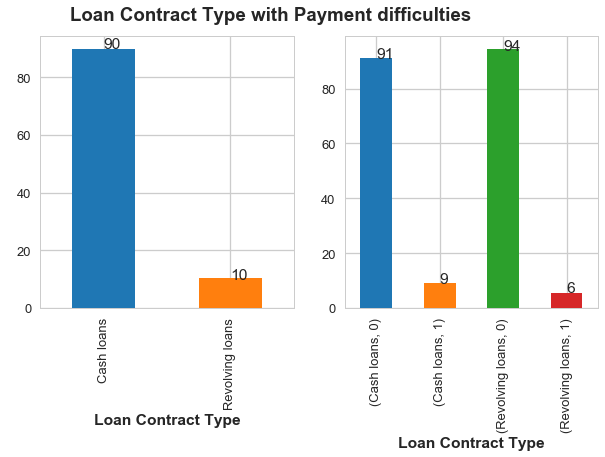

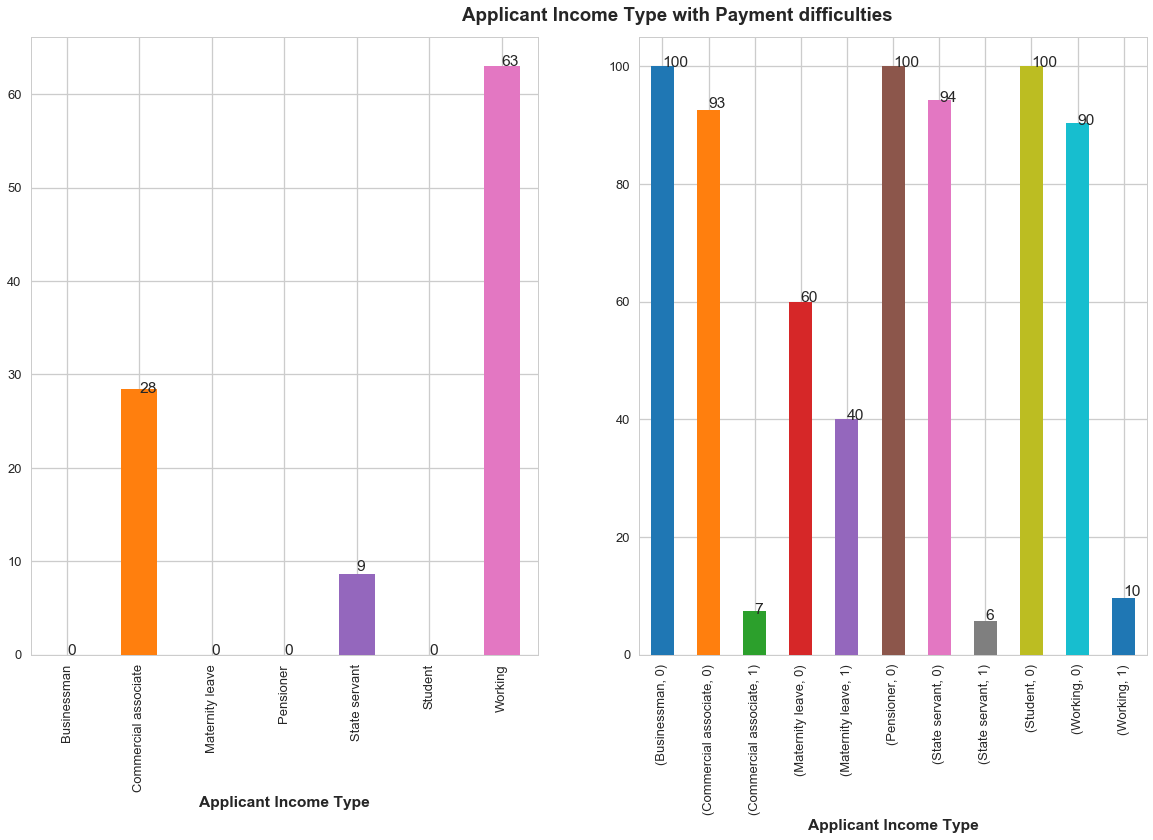

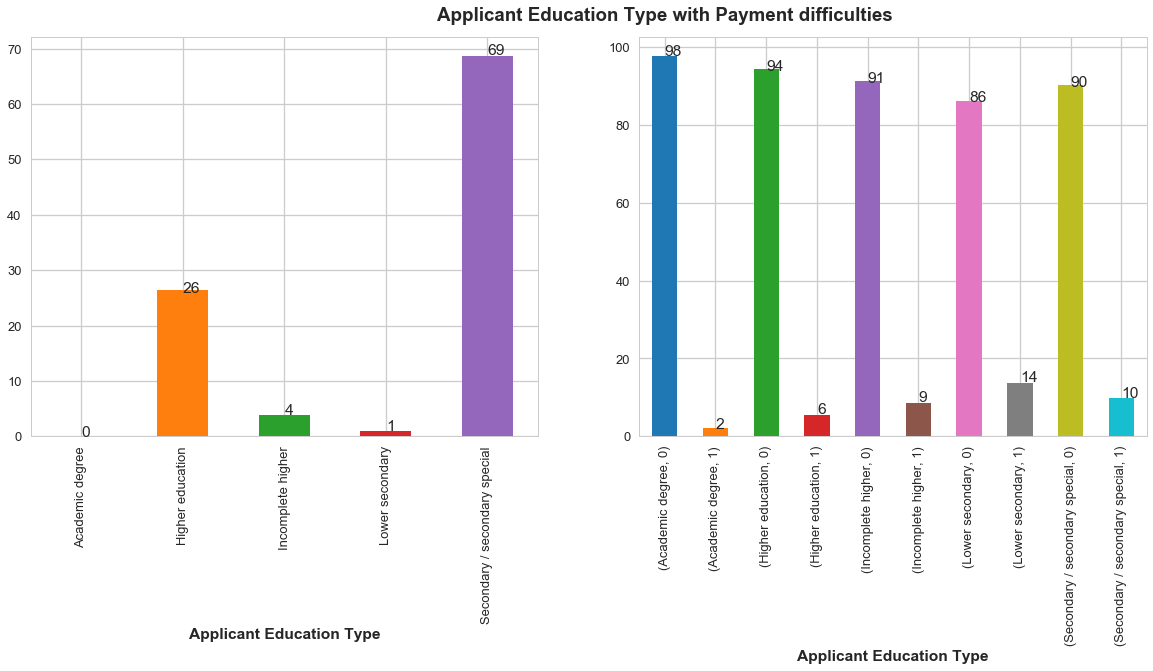

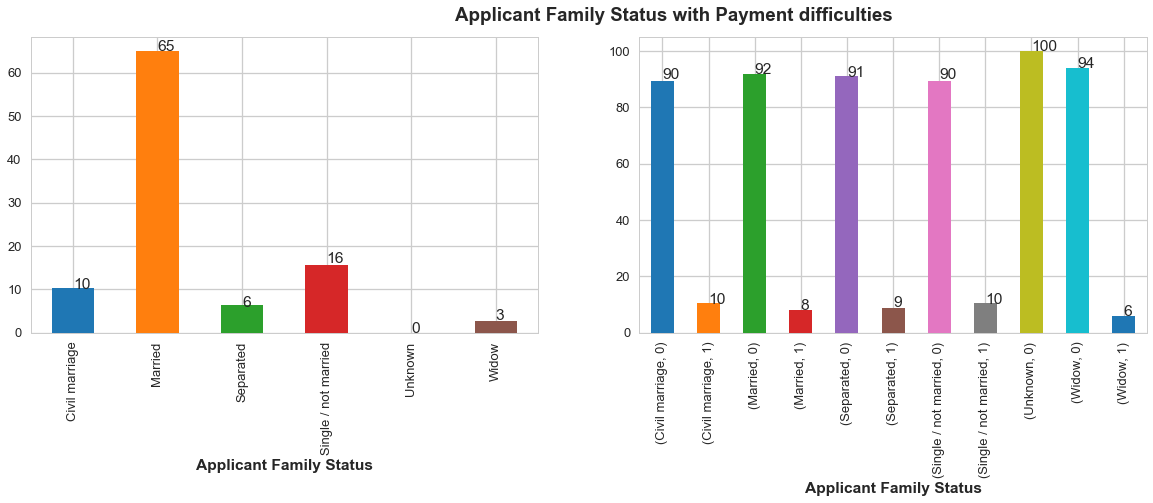

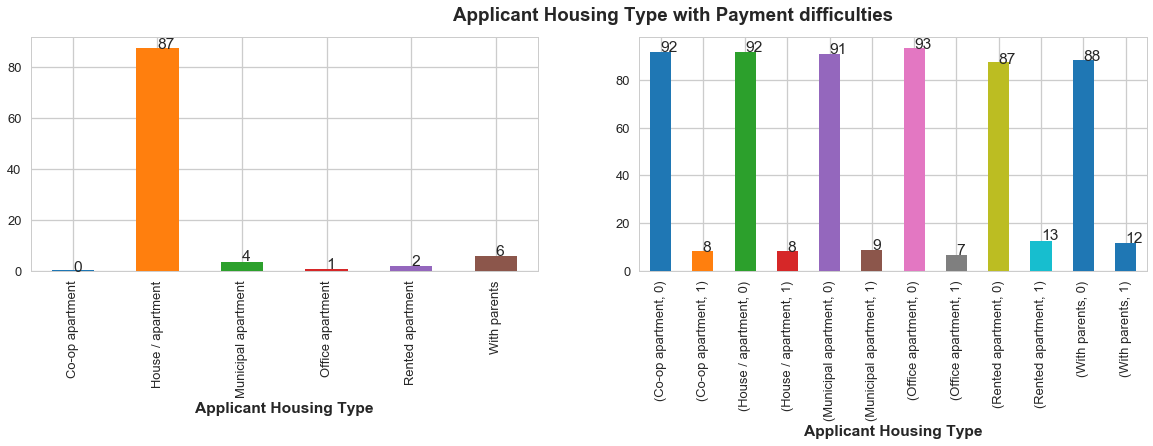

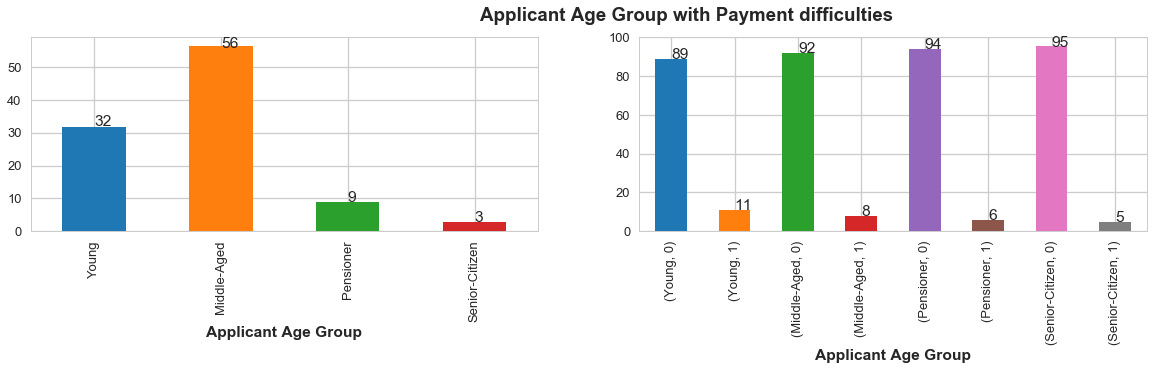

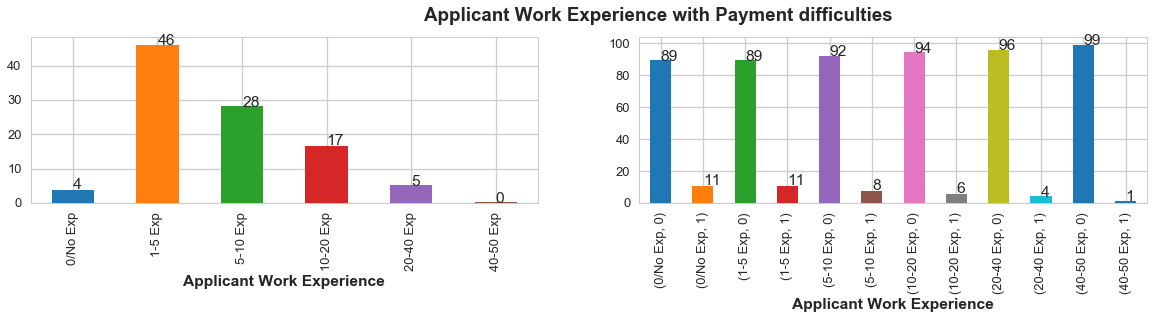

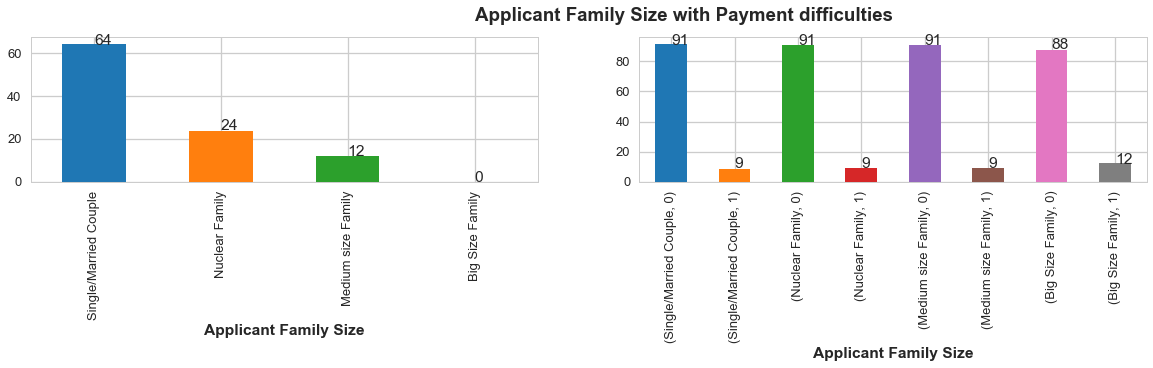

In [327]:
#calculate the percentage of payment difficuties under various categories
font={'fontsize': 'large',
 'fontweight' : 'bold',
 'verticalalignment': 'top',
 'horizontalalignment': 'right'}
font1={'fontsize': 'medium',
 'fontweight' : 'bold',
 'verticalalignment': 'top',
 'horizontalalignment': 'center'}
catlist=['NAME_CONTRACT_TYPE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AgeGroup','ExperienceGroup','FamilyGroup']
catdesc=['Loan Contract Type','Applicant Income Type','Applicant Education Type','Applicant Family Status','Applicant Housing Type','Applicant Age Group','Applicant Work Experience','Applicant Family Size']
j=0
for i in catlist:
    j=j+1
    if i=='NAME_CONTRACT_TYPE':
        fig=plt.figure(figsize=(10,5))
    else:
        fig=plt.figure(figsize=(20,25))
    fig.tight_layout()
    df1=df.groupby(by=i)['SK_ID_CURR'].count()/len(df.SK_ID_CURR)*100
    plt.subplot(int(str(j)+'21')) 
    df1.plot('bar')
    x=[]
    y=[]
    for z in df1.items():
        x.append(str(z[0]))
        y.append(round(z[1]))
    for index, value in enumerate(y):
        plt.text(index, value, str(value))
    plt.xlabel(catdesc[j-1],fontdict=font1)
    df2=df.groupby(by=[i,'TARGET'])['SK_ID_CURR'].count()/df.groupby(by=i)['SK_ID_CURR'].count()*100  
    plt.subplot(int(str(j)+'22'))
    df2.plot('bar')
    x=[]
    y=[]
    for z in df2.items():
        x.append(str(z[0]))
        y.append(round(z[1]))
    for index, value in enumerate(y):
        plt.text(index, value, str(value))
    plt.xlabel(catdesc[j-1],fontdict=font1)
    plt.title('            '+catdesc[j-1]+' with Payment difficulties',fontdict=font)
    plt.savefig(catdesc[j-1]+".jpeg",bbox_inches='tight',dpi=150)
    plt.show()


## Variant Analysis Observations
#### 1. Majority of loan applications is for Cash Loans which contributes 90% on the total applications.
#### 2. There is no much difference on the applicant with payment difficulties based on Loan contract type. Around 5% to 8% applicants are having the payment difficulty. 
#### 3. 50% of loan applications are from Working income type followeed by Commercial Associate and Pensioner.
#### 4. Unemployed and Maternity leave class applicants are having more payment difficulties. Around 35% to 40% applicants are having difficulties on payment on that income type. Whereas applicants from other income type have only 5 to 10% of difficulty.
#### 5. Interestingly Businessman and Students do not have payment difficulty.
#### 6. More applicants are from Secondary Education group around 70% of applicants are from this group.
#### 7. Academic degree applicants are having very less difficulty in the payment of loan whereas other members have 8 to10% of payment difficulty.
#### 8. Married applicants contribute 63% of total applicants.
#### 9. Widowers are having less payment difficulties
#### 10. Majority of loan applicants own a House/Aparment with 88% 
#### 11. People living in Rented apartment and with parents are having payment difficulties.
#### 12. Middle-Aged persons are looking for loan desperately compared to other age groups, since they contribute 50% of total applicants
#### 13. Pensioner and Senior-Citizens are having less payment difficulties whereas young people have highest payment difficulty
#### 14. It clearly indicates that Major loan applicants are from Single/Married couple with no children
#### 15. Size of family directly have the impact on the Payment difficulty
#### 16. People with less or no work experience have payment difficulties

In [328]:
# Dividing the dataset into two dataset based on Target

target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]

In [329]:
# Calculating Imbalance percentage
# Since the major is target0 and minor is target1

round(len(target0_df)/len(target1_df),2)

10.55

####### The Imbalance ratio is 10.55

#### Categorical Univariate Analysis in logarithmic scale for target=0 (client with no payment difficulties)

In [330]:
# Plotting in log scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
    plt.show()

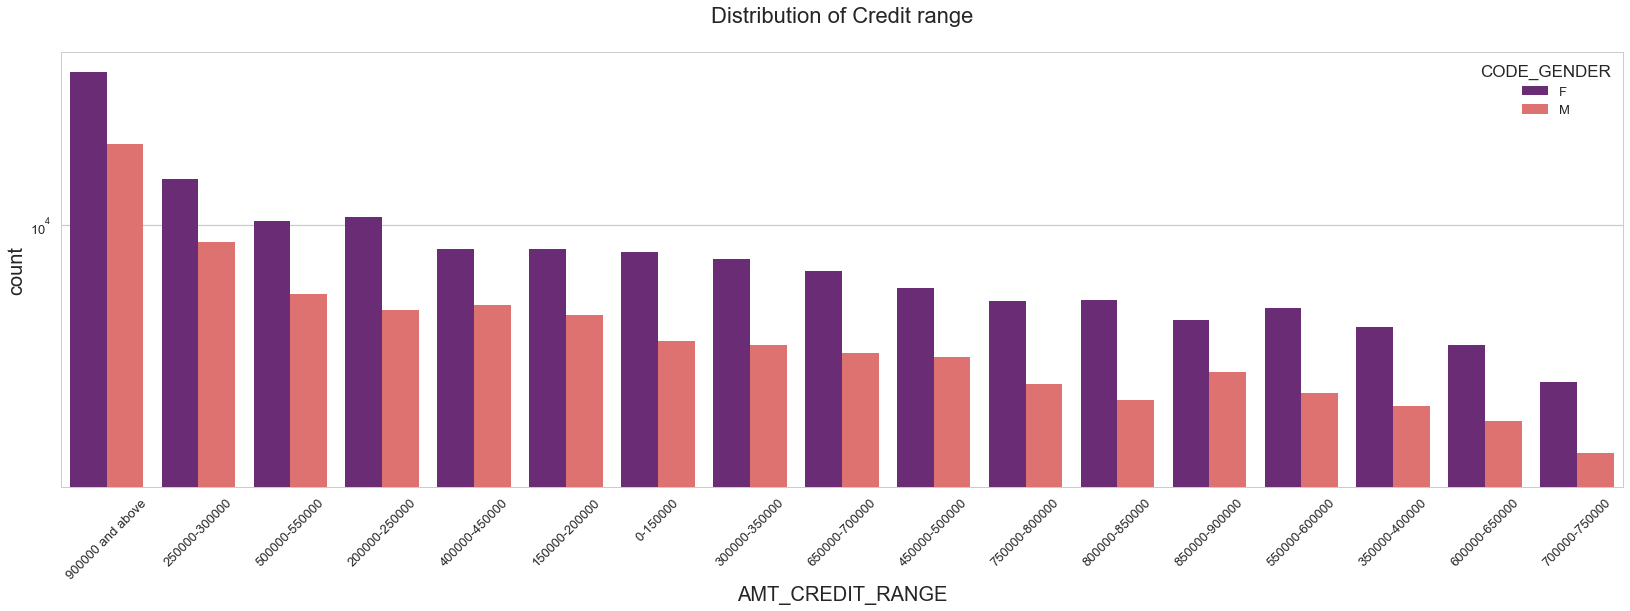

In [331]:
# Income range
uniplot(target0_df,col='AMT_CREDIT_RANGE',title='Distribution of Credit range',hue='CODE_GENDER')

Conclusions from the graph

1. Female counts are comparitively higher than male.
2. This graph show that females are more than male in having credits.
3. Lesser count for credit range 400000 and above.

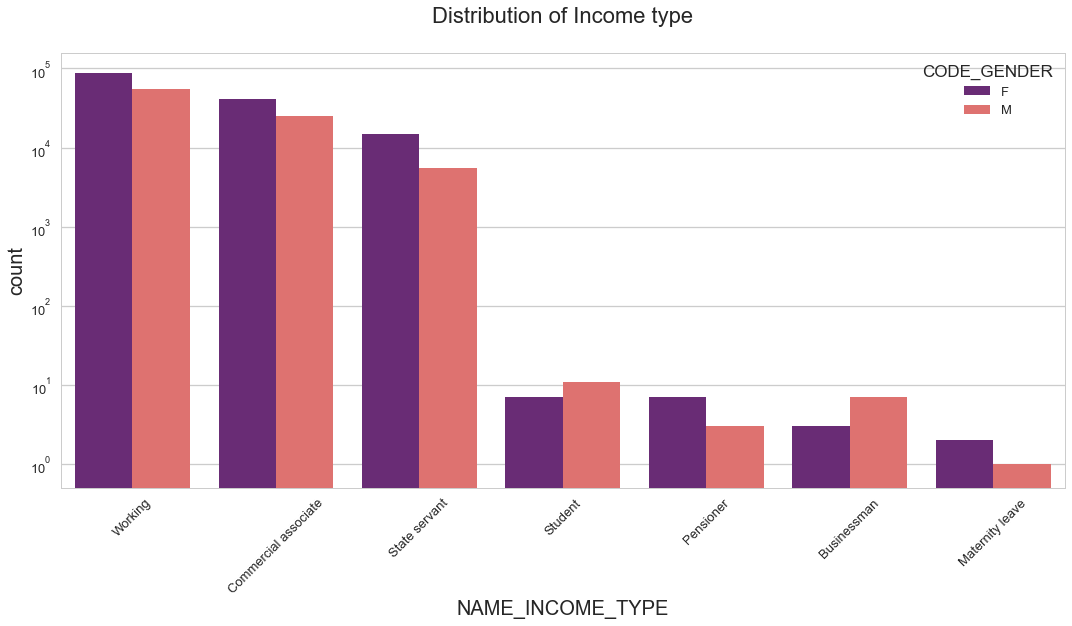

In [332]:
# Income type

uniplot(target0_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Conclusions from the graph.

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
2. Females in the above mentioned catagoris have more number of credits than male.
3. Credits are low for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

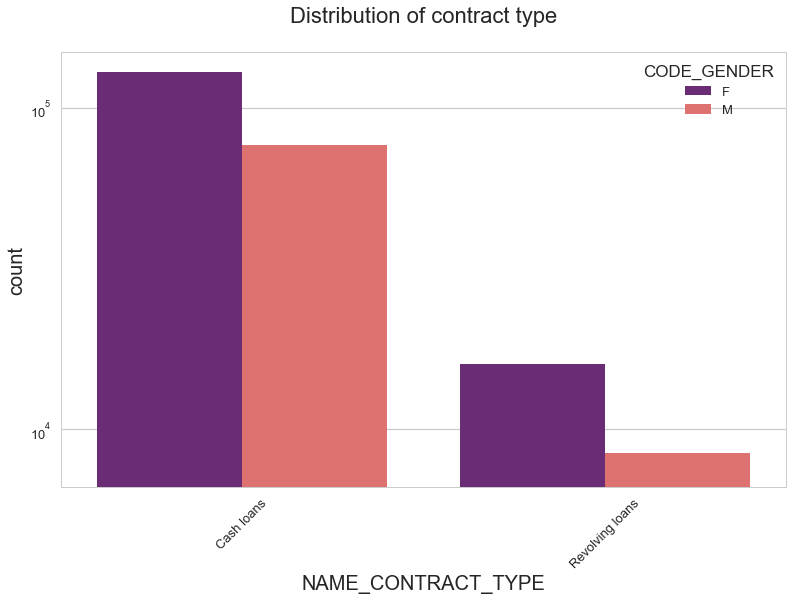

In [333]:
# Contract type

uniplot(target0_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Conclusions from the graph.

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.

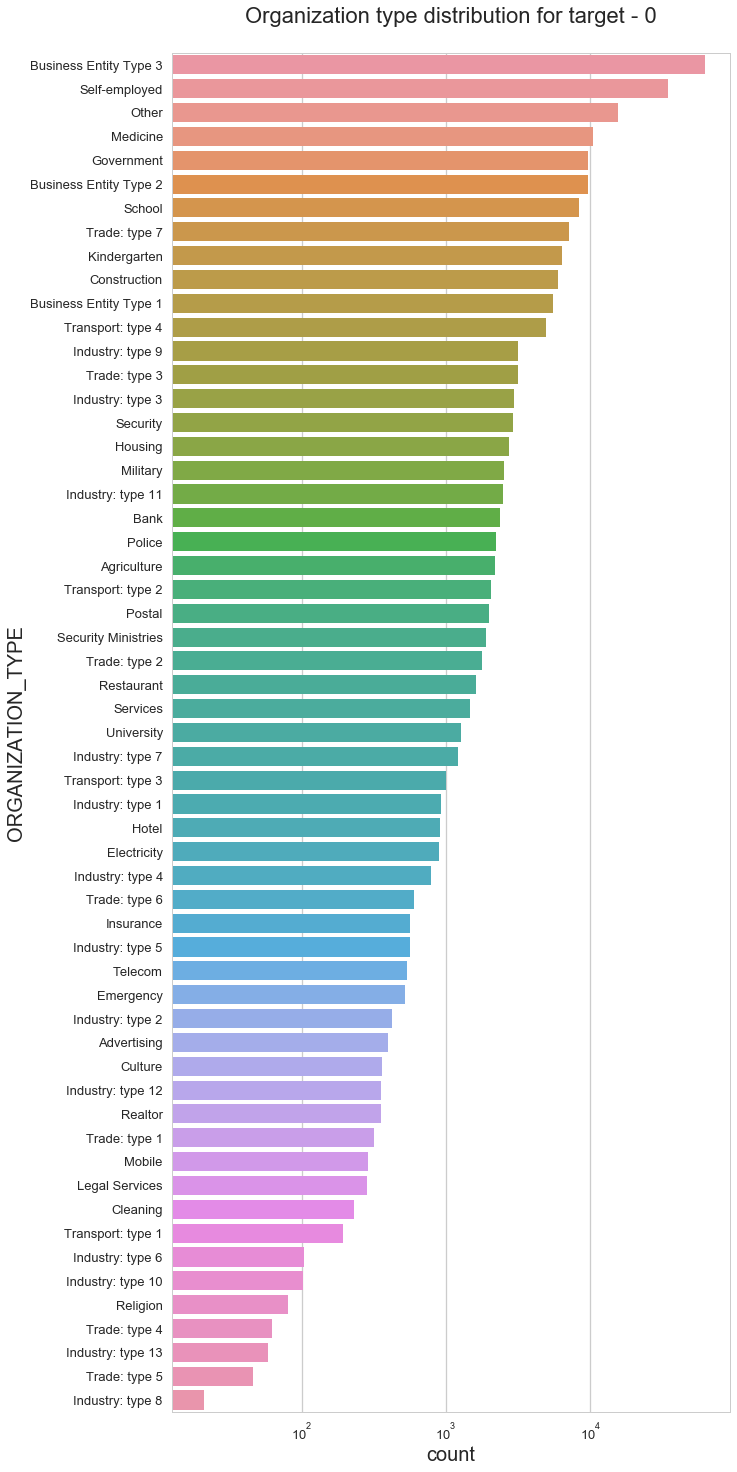

In [334]:
# Plotting for Organization type in log scale

plt.figure(figsize=(10,25))
plt.title("Organization type distribution for target - 0")
plt.xscale('log')
sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

Conclusions from the graph

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’,
   ‘Other’ , ‘Medicine’.
2. Least number of clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.

#### Categorical Univariate Analysis in logarithmic scale for target=1 (client with payment difficulties)

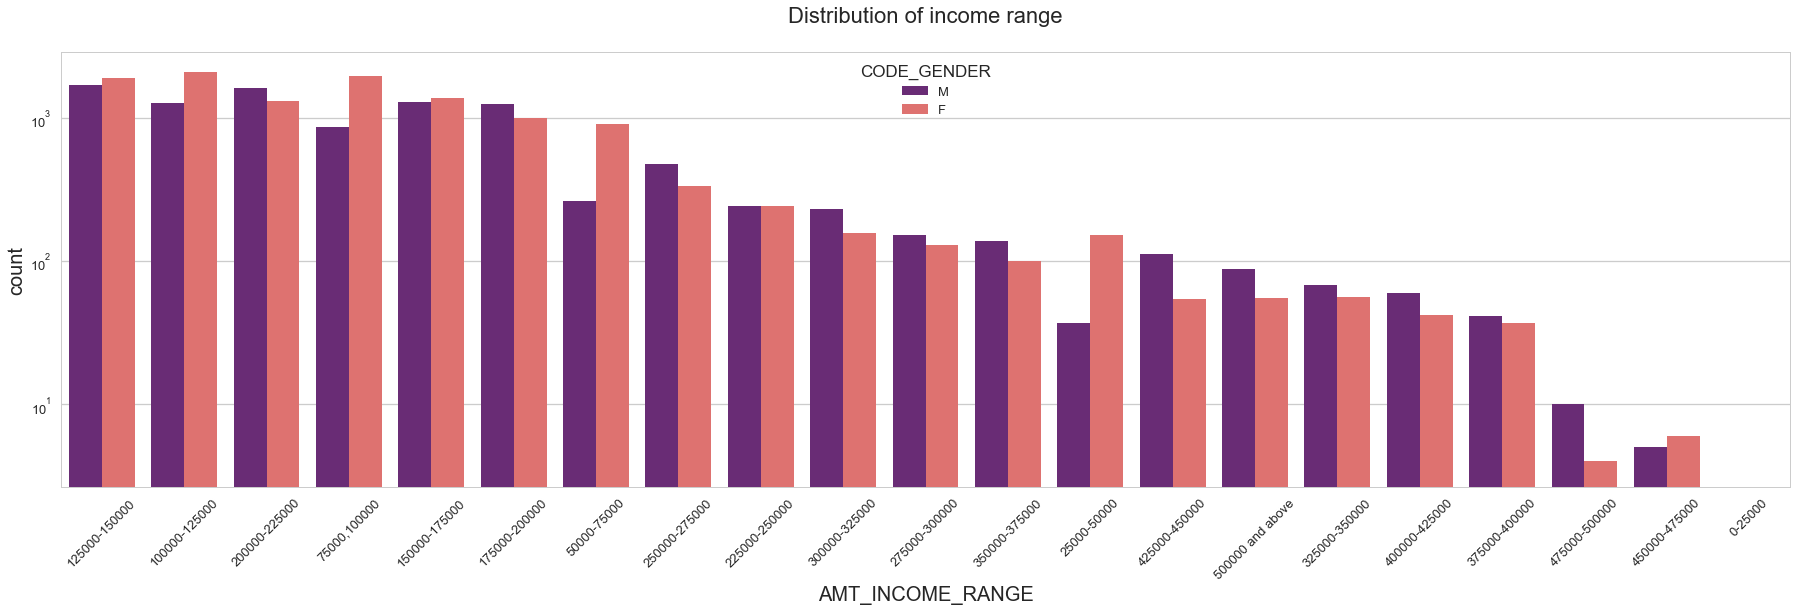

In [335]:
# Income range

uniplot(target1_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Conclusions from the graph

1. Male counts are higher than female.
2. Income range from 100000 to 200000 is having more number of credits.
3. This graph show that males are more than female in having credits for that range.
4. Very less count for income range 400000 and above.

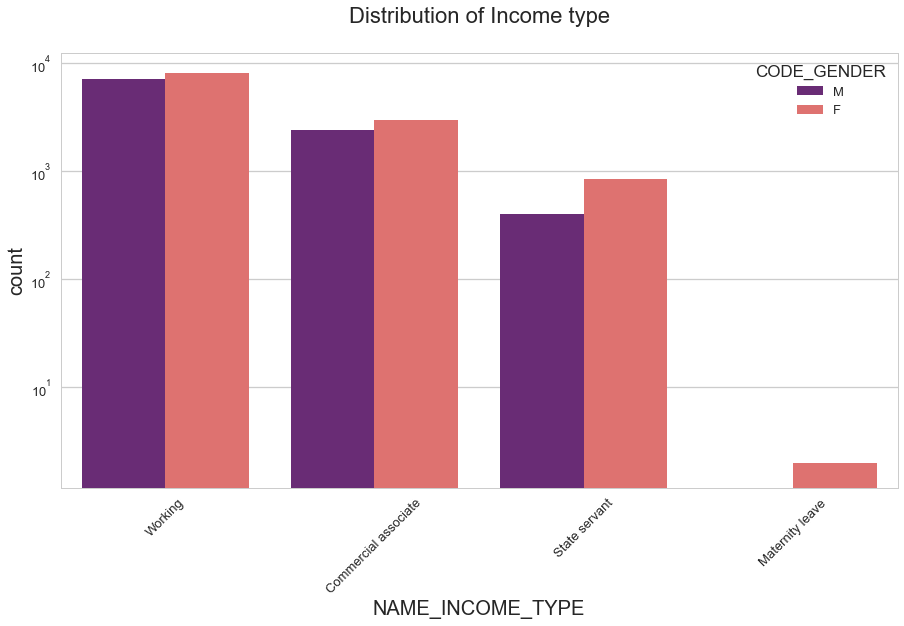

In [336]:
# Income type

uniplot(target1_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Conclusions from the graph

1. The income type ‘working’, ’commercial associate’, and ‘State Servant’ have higher number of credits.
2. Less number of credits for income type  ‘Maternity leave’.
3. For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

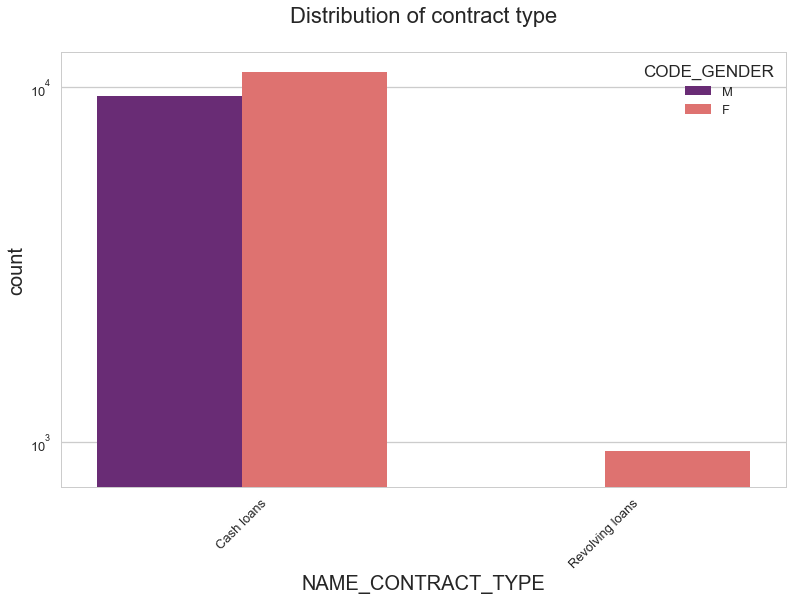

In [337]:
# Contract type

uniplot(target1_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Conclusions from the graph

1. The contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’.
2. Here this also Female is leading for applying credits.

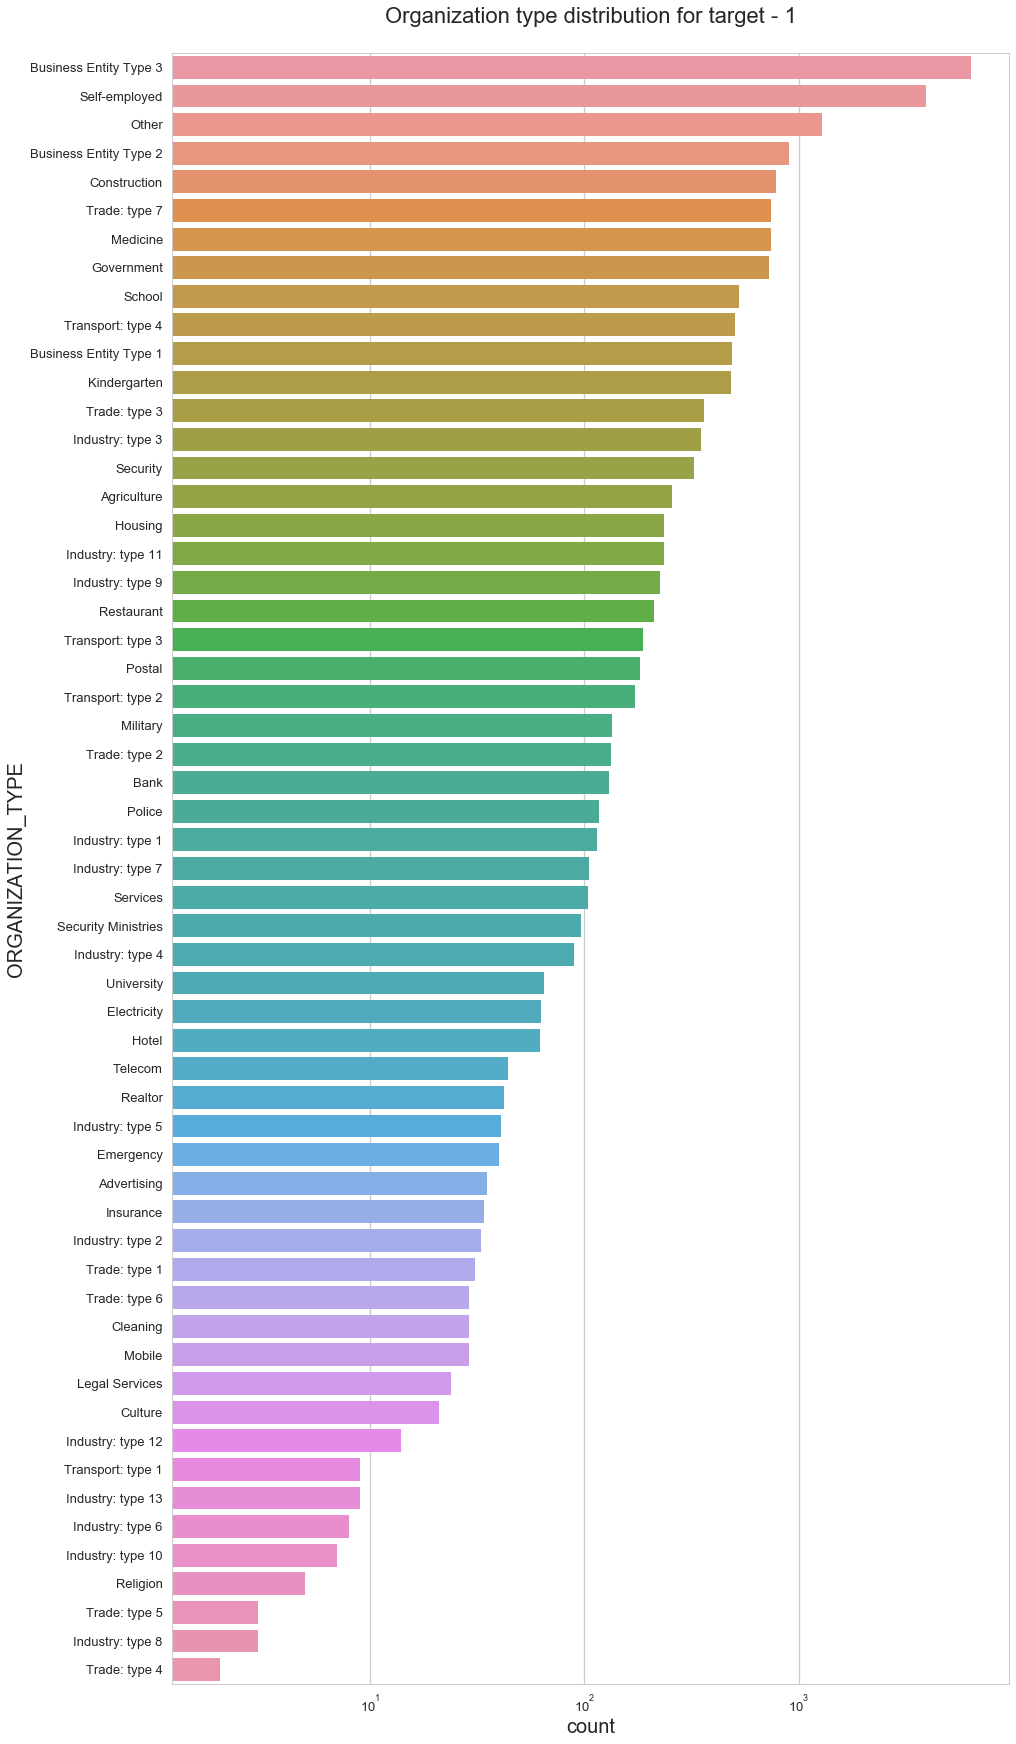

In [338]:
# Plotting for Organization type in log scale

plt.figure(figsize=(15,30))
plt.title("Organization type distribution for target - 1")
plt.xscale('log')
sns.countplot(data=target1_df,y='ORGANIZATION_TYPE',order=target1_df['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

Conclusions from the graph

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Business entity Type 2’ and ‘Construction’.
2. Less clients are from Transport type 1, Industry type 8,type 6, type 10, type 13, religion and  trade type 5, type 4.

In [339]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]
target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [340]:
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,age,Employed_years,registered_years,id_published_years
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,-0.266534,-0.030948,-0.155518,0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295,-0.266543,-0.031106,-0.155402,0.118868
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110074,0.054666,0.060868,-0.040559,0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758,0.054597,0.060960,-0.040511,0.036586
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.060706,0.169030,0.104251,0.015318,0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194,0.168978,0.104619,0.015422,0.038195
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064328,0.100287,0.074643,-0.010712,0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087,0.100253,0.074969,-0.010662,0.027191
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,1.000000,0.041663,-0.000900,0.042400,0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332,0.041575,-0.000889,0.042404,0.010446
DAYS_BIRTH,-0.266534,0.054666,0.169030,0.100287,0.041663,1.000000,0.307787,0.265449,0.083331,-0.051299,-0.058627,-0.038104,-0.012789,-0.167477,-0.111539,-0.029007,0.999601,0.307798,0.265622,0.084188
DAYS_EMPLOYED,-0.030948,0.060868,0.104251,0.074643,-0.000900,0.307787,1.000000,0.126708,0.106823,-0.026444,-0.065435,-0.086966,-0.063533,-0.118224,-0.125954,-0.069567,0.307690,0.996388,0.126889,0.107059
DAYS_REGISTRATION,-0.155518,-0.040559,0.015318,-0.010712,0.042400,0.265449,0.126708,1.000000,0.036788,0.029553,-0.017715,-0.015092,-0.007716,-0.038064,-0.047339,-0.027231,0.265466,0.126554,0.999336,0.037363
DAYS_ID_PUBLISH,0.119164,0.036702,0.038197,0.027354,0.010299,0.083331,0.106823,0.036788,1.000000,-0.008538,-0.027302,-0.020823,-0.008525,-0.054875,-0.033427,-0.001476,0.083447,0.106695,0.036857,0.997192
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032953,0.133213,-0.051299,-0.026444,0.029553,-0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720,-0.051385,-0.026173,0.029497,-0.008645


In [341]:
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,age,Employed_years,registered_years,id_published_years
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,-0.175025,-0.006823,-0.110854,0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557,-0.175173,-0.006808,-0.111320,0.091648
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,0.103026,0.053798,-0.011378,0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230,0.102741,0.054368,-0.011255,0.051068
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,0.200718,0.107605,0.021973,0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465,0.200692,0.108194,0.022546,0.065409
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,0.100200,0.060193,-0.019762,0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012,0.100045,0.059901,-0.019453,0.043793
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,0.044444,0.015246,0.033490,0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753,0.044624,0.017593,0.033317,0.018103
DAYS_BIRTH,-0.175025,0.103026,0.200718,0.100200,0.044444,1.000000,0.256870,0.192350,0.146246,-0.041994,-0.046320,-0.022208,-0.000356,-0.145884,-0.096181,-0.009633,0.999527,0.257478,0.193045,0.146847
DAYS_EMPLOYED,-0.006823,0.053798,0.107605,0.060193,0.015246,0.256870,1.000000,0.086286,0.104244,-0.010328,-0.069566,-0.082264,-0.056081,-0.118869,-0.139863,-0.069316,0.256781,0.992966,0.086498,0.104424
DAYS_REGISTRATION,-0.110854,-0.011378,0.021973,-0.019762,0.033490,0.192350,0.086286,1.000000,0.061563,0.044753,-0.006362,-0.000896,0.001416,-0.015831,-0.039204,-0.026105,0.192123,0.085668,0.999174,0.062657
DAYS_ID_PUBLISH,0.091042,0.051113,0.065143,0.044128,0.017779,0.146246,0.104244,0.061563,1.000000,-0.012709,-0.024860,-0.013162,-0.002567,-0.048184,-0.015838,0.015598,0.146017,0.105011,0.061366,0.997391
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,-0.041994,-0.010328,0.044753,-0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319,-0.041727,-0.008887,0.044880,-0.012226


In [342]:
# Corelation plots

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 60
    sns.heatmap(data, annot=False, cmap="coolwarm")
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

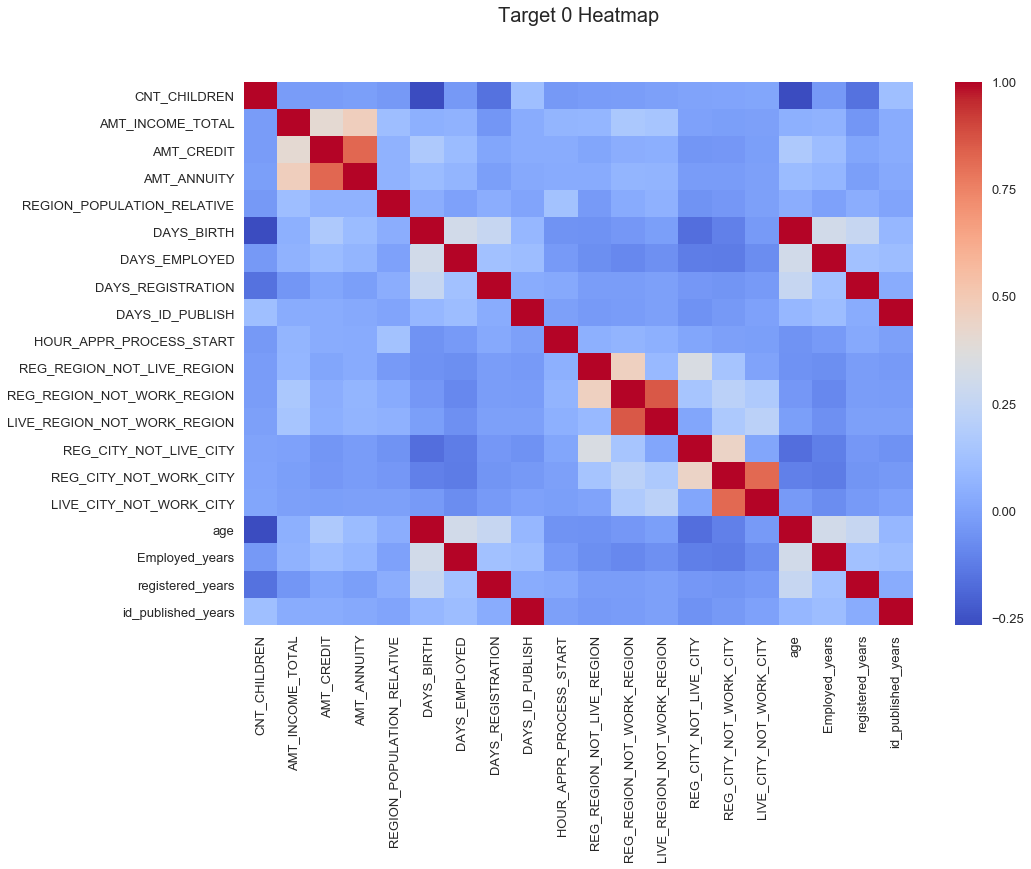

In [343]:
targets_corr(data=target0,title='Target 0 Heatmap')

Observations from the heatmap for Target 0

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

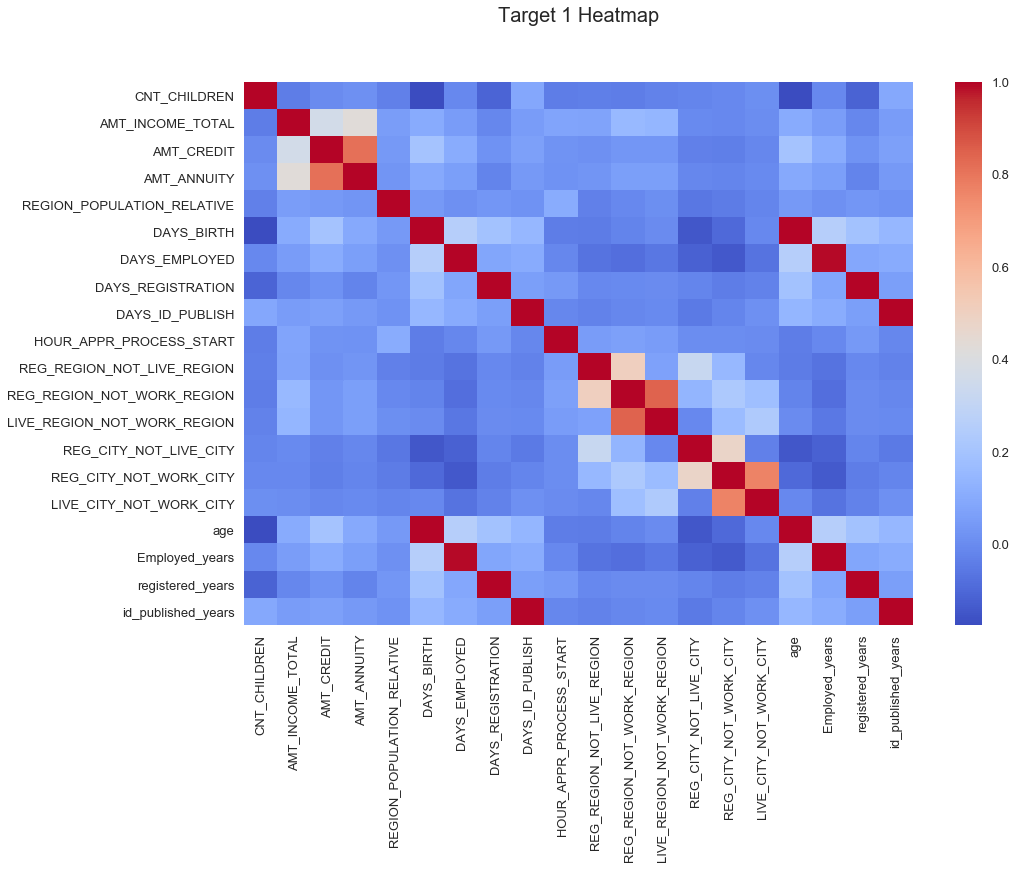

In [344]:
targets_corr(data=target1,title='Target 1 Heatmap')

Observations from the heatmap for Target 1.
This heatmap is also having similar observations just like Target 0, but a few points are different. They are listed below.

1. The client's permanent address does not match contact address are having less children and vice-versa
2. the client's permanent address does not match work address are having less children and vice-versa

##### Univariate analysis for variables

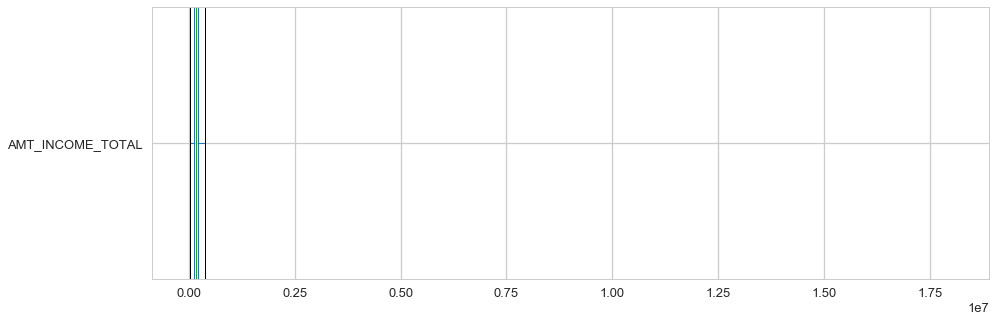

In [345]:
# For Target0

# Distribution of income amount

target0_df.boxplot(column='AMT_INCOME_TOTAL', vert = False, widths = [3], figsize=(15,5))

Observations

1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.

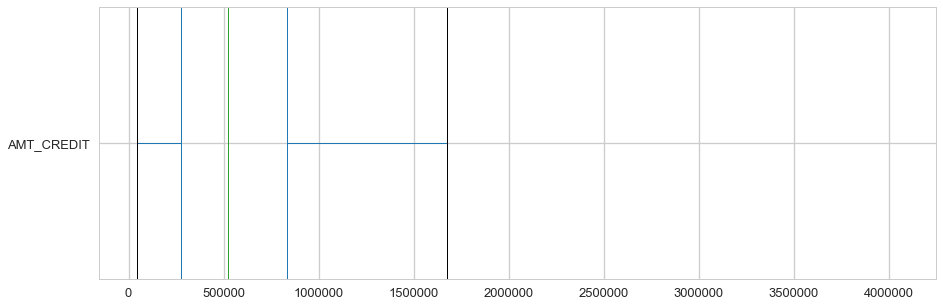

In [346]:
# Disrtibution of credit amount
target0_df.boxplot(column='AMT_CREDIT', vert = False, widths = [3], figsize=(15,5))

Observations

1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

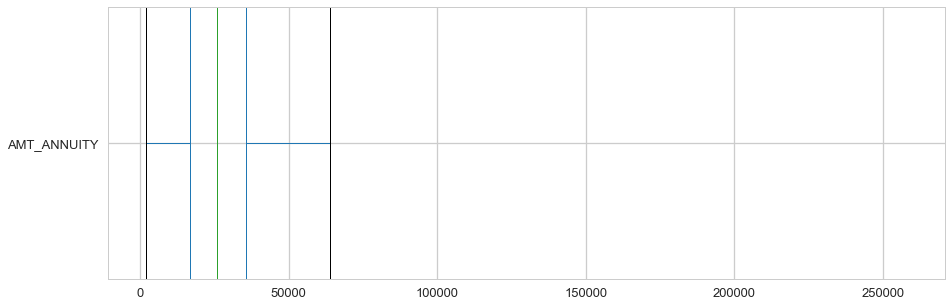

In [347]:
# Distribution of anuuity amount

target0_df.boxplot(column='AMT_ANNUITY', vert = False, widths = [3], figsize=(15,5))

Observations
1. Some outliers are noticed in annuity amount.
2. The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

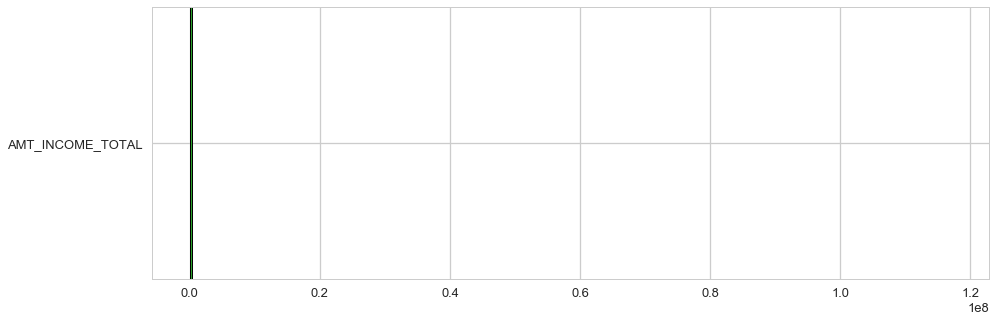

In [348]:
# For Target1

# Distribution of income amount

target1_df.boxplot(column='AMT_INCOME_TOTAL', vert = False, widths = [3], figsize=(15,5))

Observations

1. Some outliers are noticed in income amount.

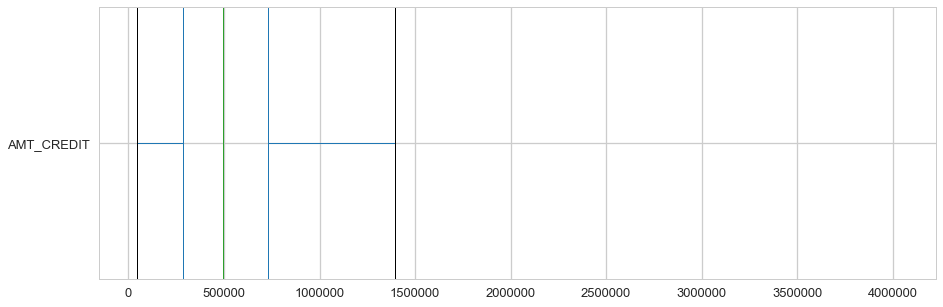

In [349]:
# Distribution of credit amount
target1_df.boxplot(column='AMT_CREDIT', vert = False, widths = [3], figsize=(15,5))

Observations

1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

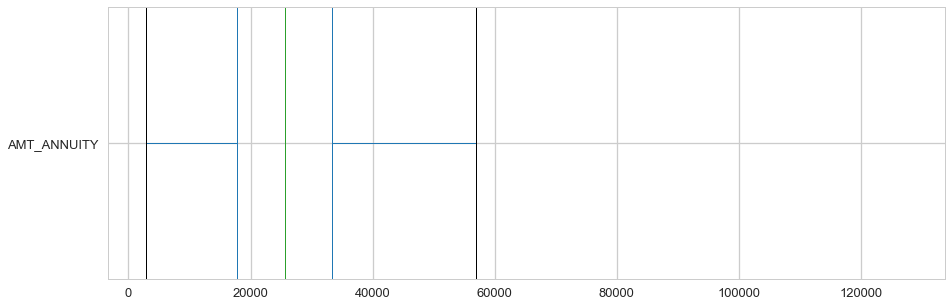

In [350]:
# Distribution of Annuity amount
target1_df.boxplot(column='AMT_ANNUITY', vert = False, widths = [3], figsize=(15,5))

Observations

1. Some outliers are noticed in annuity amount.
2. The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

##### Bivariate analysis for numerical variables

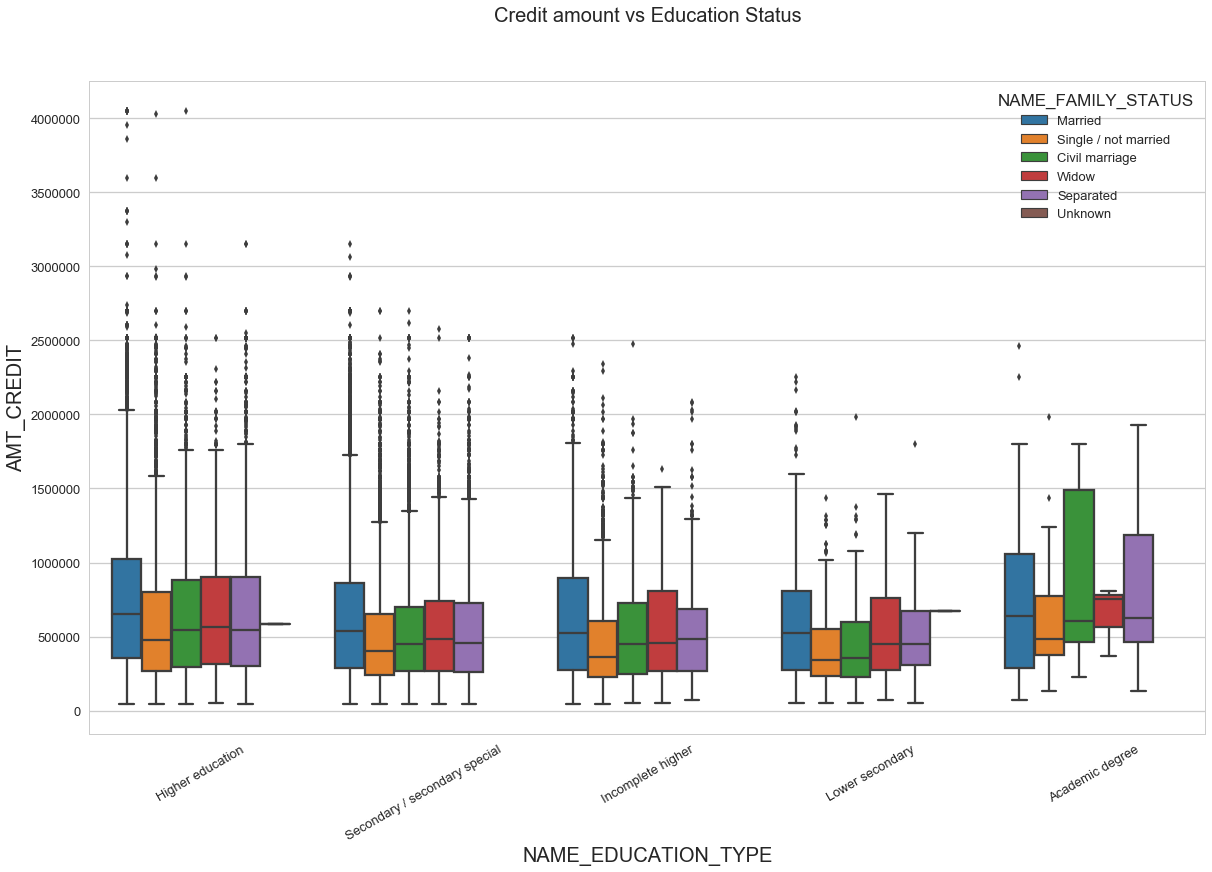

In [351]:
# Target0

# Boxplot for Credit amount

plt.figure(figsize=(20,12))
plt.xticks(rotation=30)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

Observations:

1- Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.

2- Higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.

3- Civil marriage for Academic degree is having most of the credits in the third quartile.

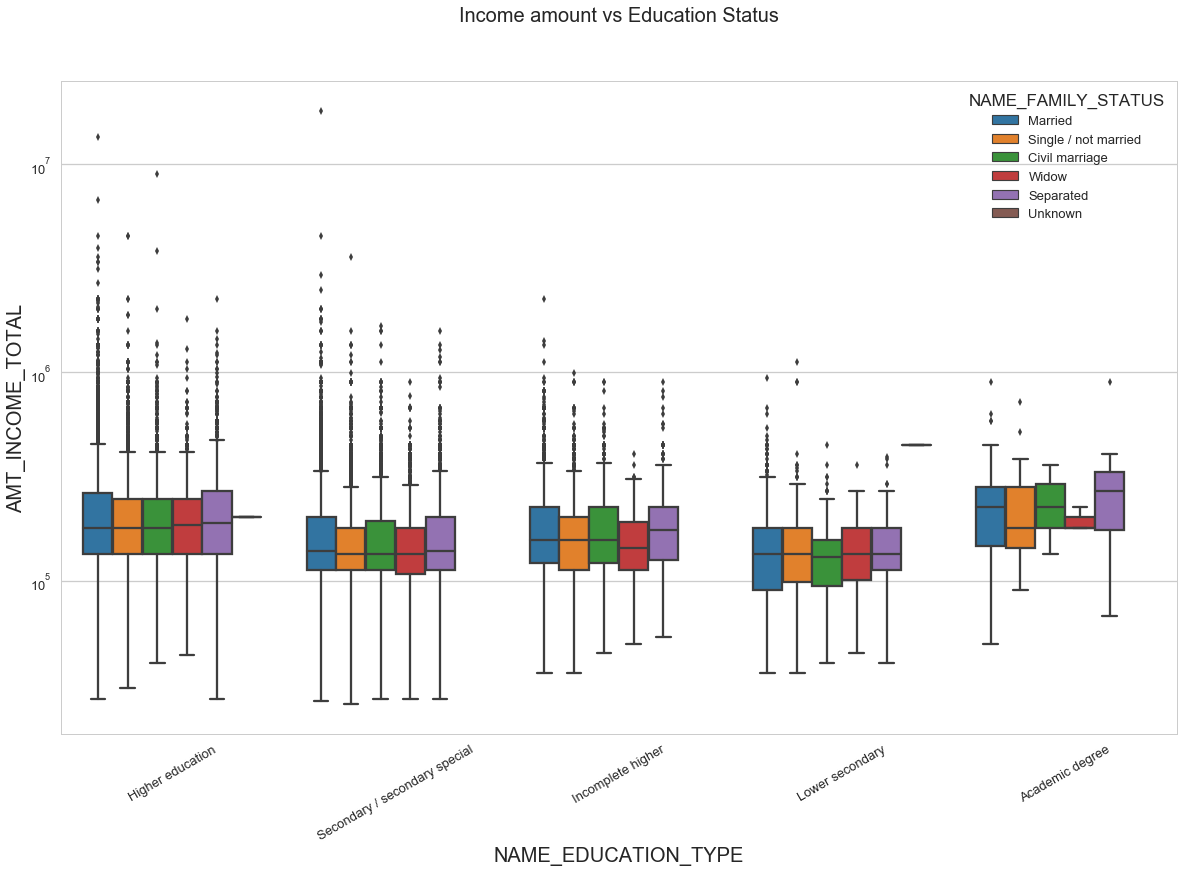

In [352]:
# Boxplot for Income amount

plt.figure(figsize=(20,12))
plt.xticks(rotation=30)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Observations:

1- In 'Higher education' the income amount is mostly equal with family status. It contains outliers. Less outlier are there for Academic degree but the income amount there is little higher that Higher education.

2- Lower secondary of civil marriage family status are have less income amount than others.

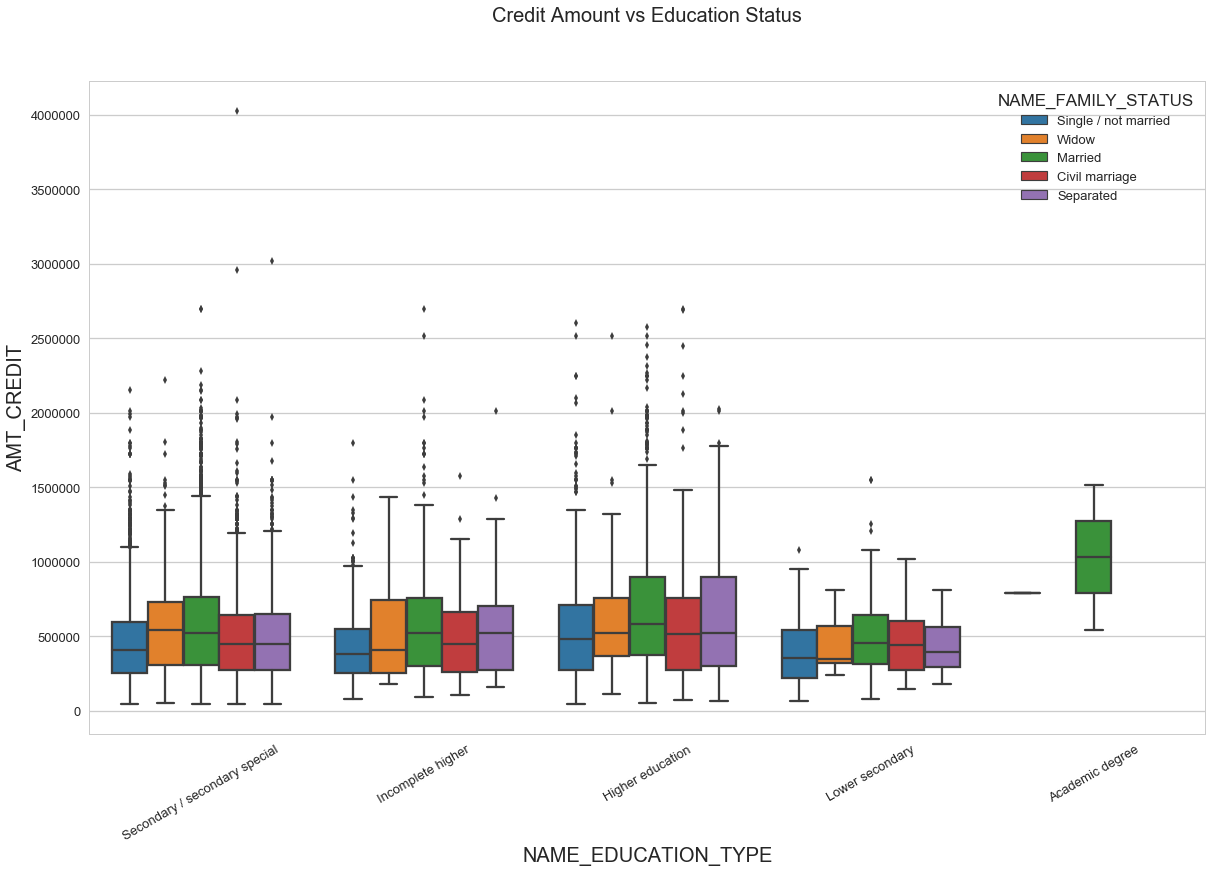

In [353]:
# Target1

# Boxplot for credit amount

plt.figure(figsize=(20,12))
plt.xticks(rotation=30)
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()


Observations:

1- Highest outliers are for 'Civil marriage' and 'Seperated' in Secondry.

2- 'Married' for Academic degree is having most of the credits in the third quartile.

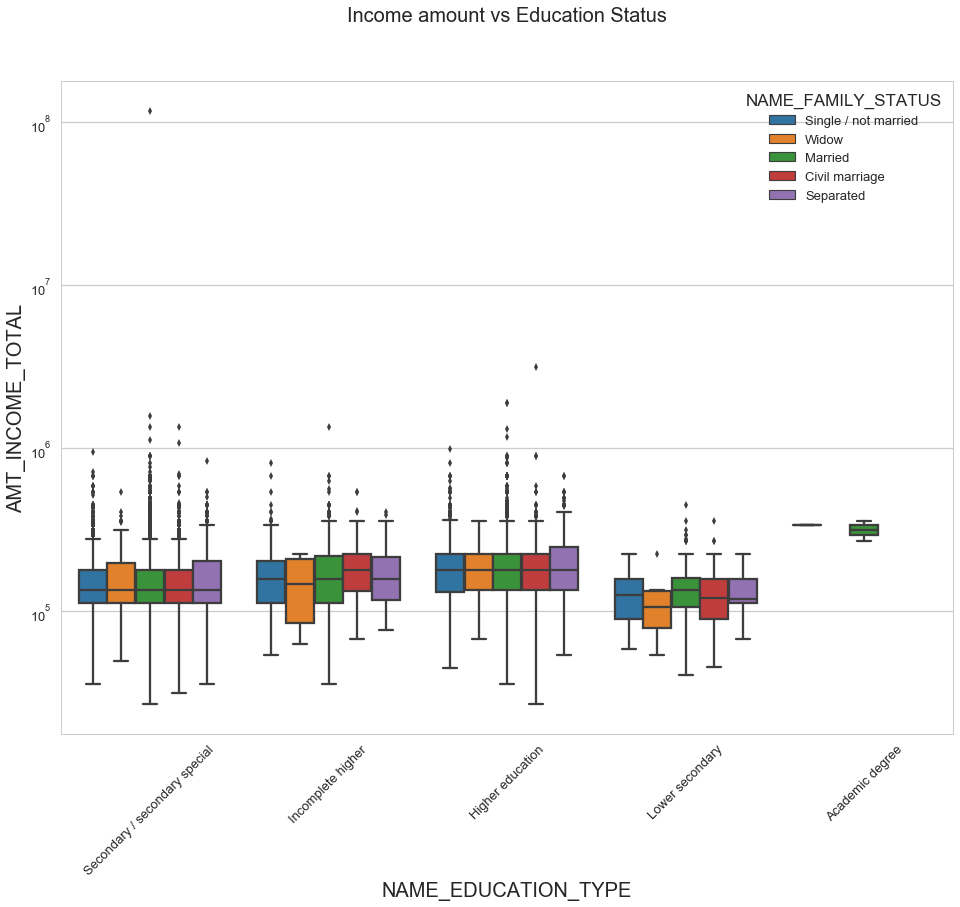

In [354]:
# Boxplot for Income amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Observations:

1- From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status.

2- Lower secondary are have less income amount than others.

#### Previous Applications:

In [355]:
df_prv=pd.read_csv('previous_application.csv')
df_prv.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [356]:
df_prv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [357]:
df_prv.shape

(1670214, 37)

In [358]:
# Cleaning missing data

# listing the null values columns having more than 30%

emptycol1=df_prv.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [359]:
# Removing 15 columns

emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
df_prv.drop(labels=emptycol1,axis=1,inplace=True)
df_prv.shape

(1670214, 22)

In [360]:
df_prv=df_prv.drop(df_prv[df_prv['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_prv=df_prv.drop(df_prv[df_prv['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_prv=df_prv.drop(df_prv[df_prv['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
df_prv.shape

(69635, 22)

In [361]:
# Merging both the datasets

new_df=pd.merge(left=df,right=df_prv,how='inner',on='SK_ID_CURR',suffixes='_x')

In [362]:
# Renaming column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [363]:
# Removing unwanted columns

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

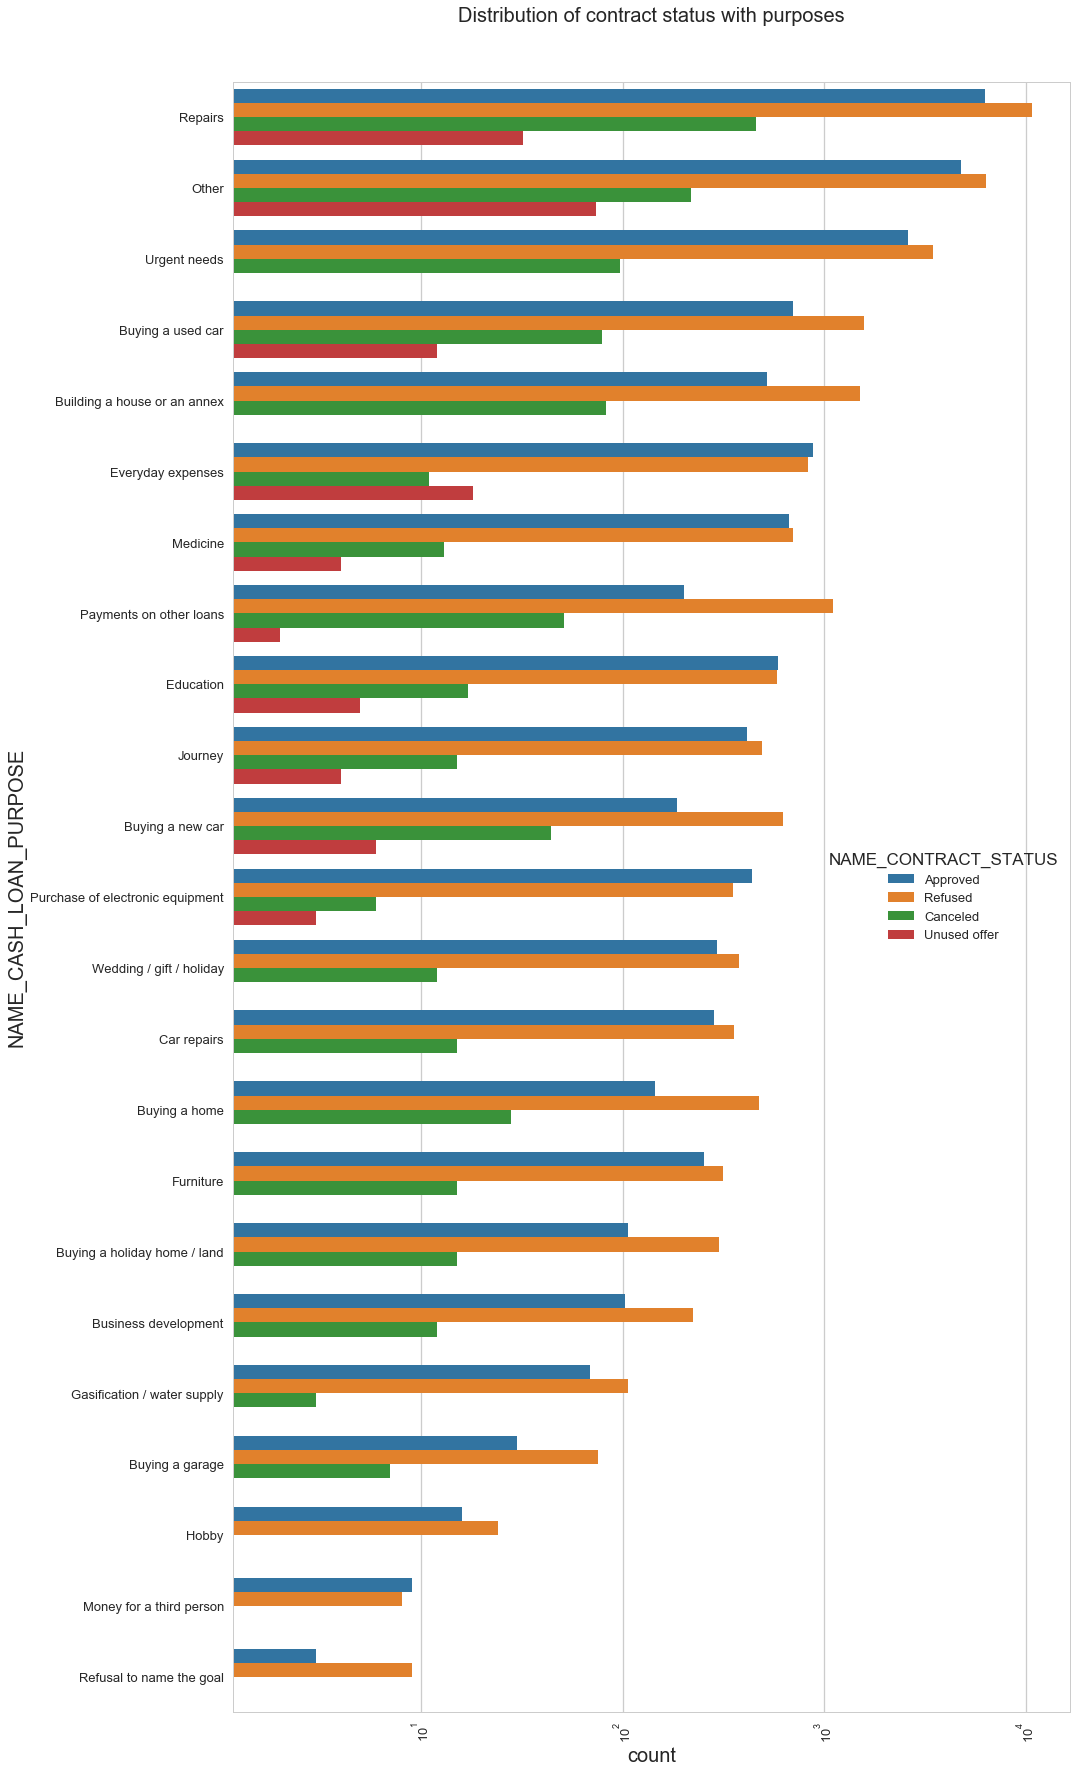

In [364]:
# Contract status distribution in log scale

plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

Observations

1. Most loan rejections are from purpose 'repairs'.
2. For education purposes we have equal number of approves and rejection
3. 'Payments on other loans' and 'Buying new car' is having significant higher rejection than approves.
4. 'Refusal to name the goal' and 'Money for third person' and 'Hobby' have never being cancelled after requesting.

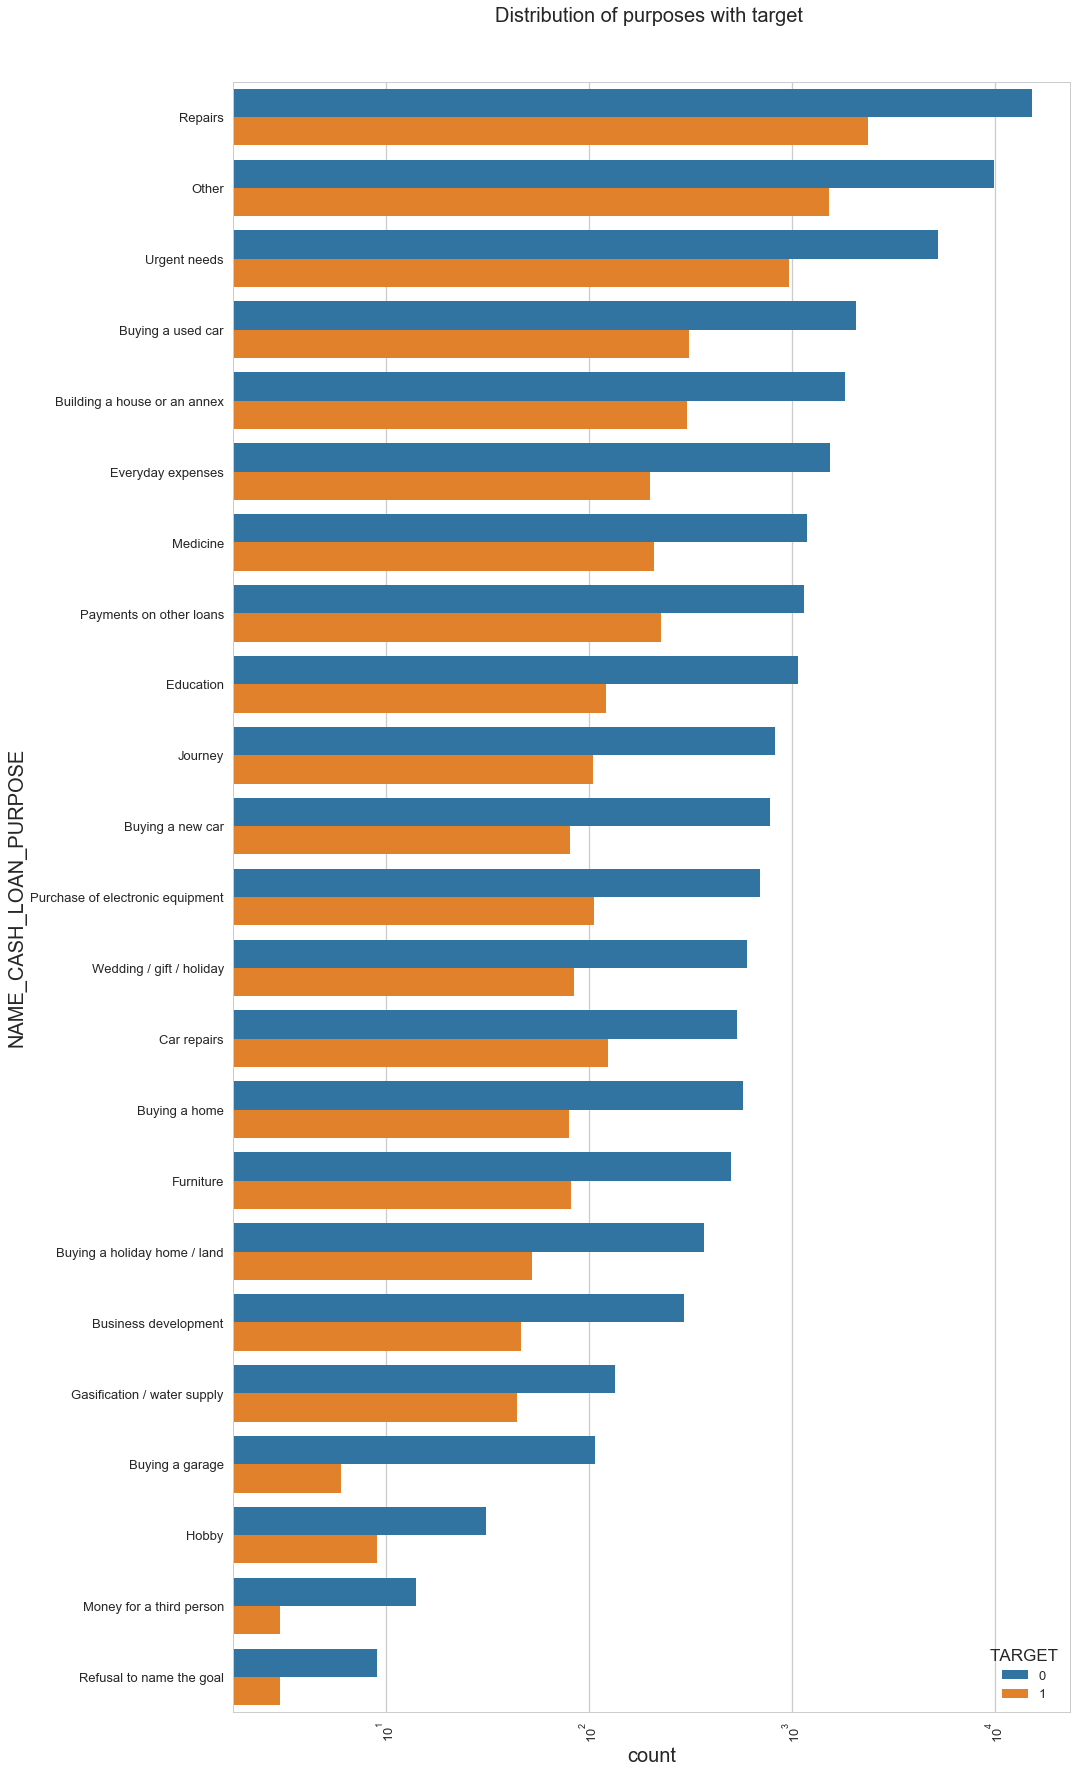

In [365]:
# Distribution of contract status

plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 

Observations:

1. For purpose 'Repairs' repayment is a problem.
2. There are few places where loan payment is significant higher than facing difficulties.
    They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' so we can focus on these purposes for which the client is having minimal payment difficulties.

#### Performing bivariate analysis

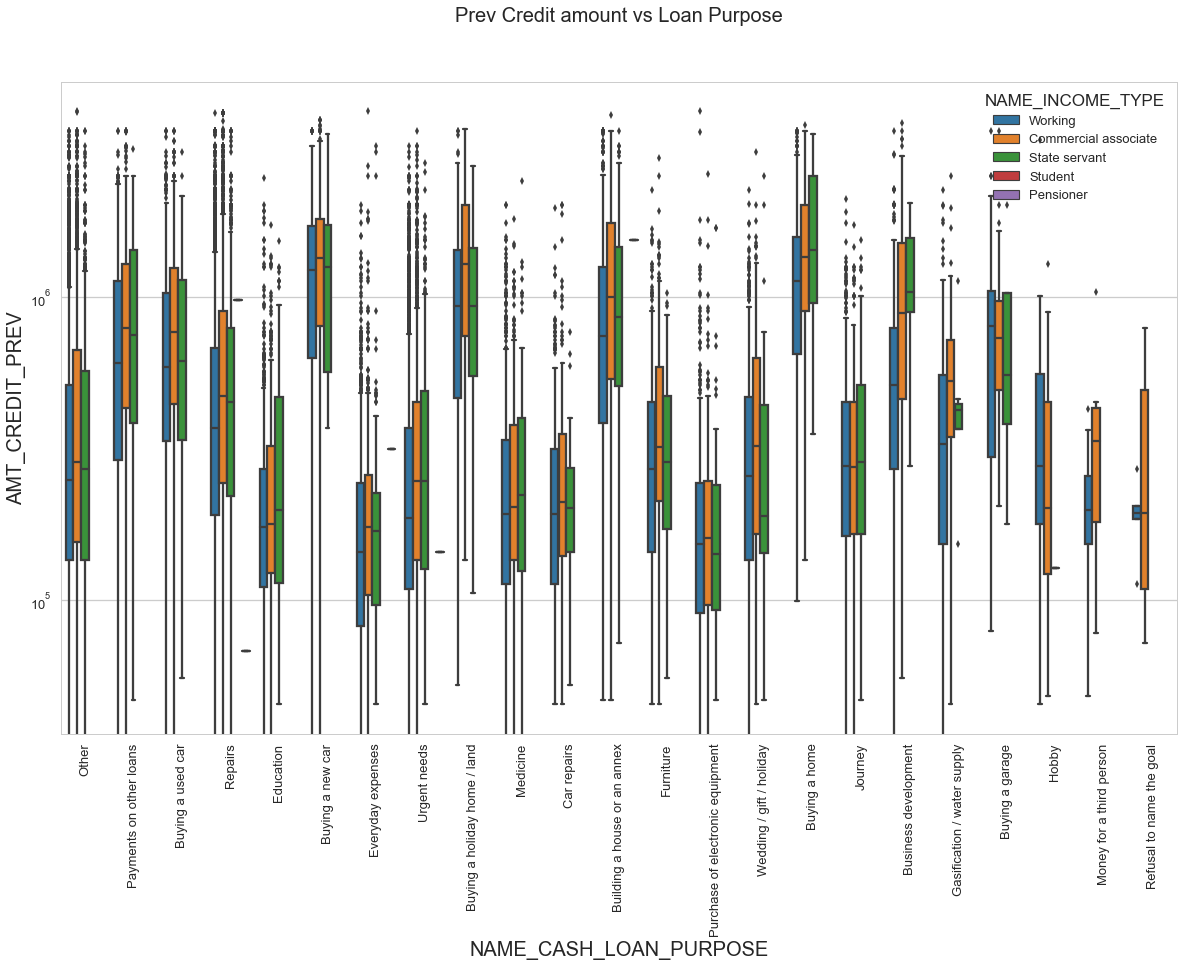

In [366]:
# Boxplot for Credit amount in log scale

plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

Observations:
    
1. Ccredit amount of Loan purposes like 'Buying a home','Buying a holiday home / land','Buying a new car' and 'Building a house' is higher.
2. Money for third person or a Hobby is having less credits applied.

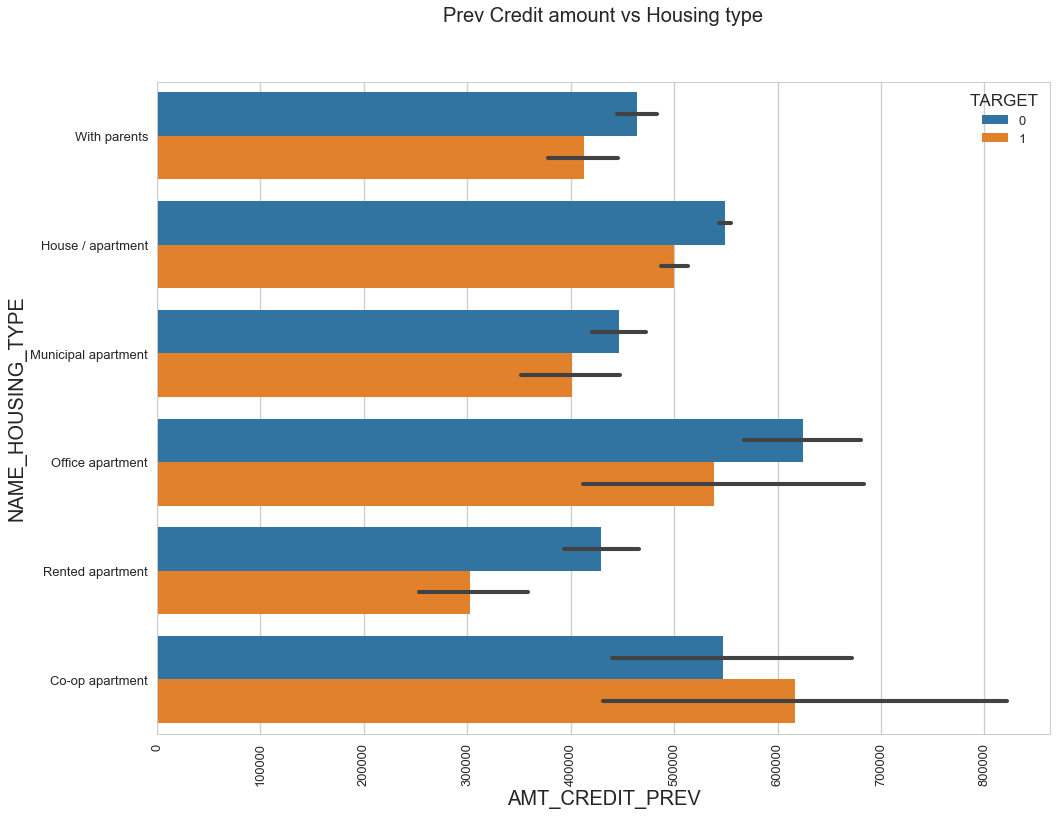

In [367]:
# Boxplot for Credit amount prev vs Housing type in log scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='NAME_HOUSING_TYPE',hue='TARGET',x='AMT_CREDIT_PREV', orient= 'h')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Observations:

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.
So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.
Office apartments have high payment issues

# Overall / Final Observations / Recommendations

**1. Bank can continue to focus on Working Professional, Pensioner and Commercial Associate as they have large number of application and less number of defaulters**

**2. Bank to consider additional care while lending loan to follow category of people,**

   ***2.1 Young Age People***
    
   ***2.2 Maternity Leave and Unemployed People***
    
   ***2.3 Less Educated (Secondary & Lower Secondary)***
    
   ***2.4 Big Size Family with More childrens***
   
   ***2.5 Applicant who live in a Rented Apartment***
   
   ***2.6 Applicant with less or no work experience***